# Machine Learning and Deep Learning Masters Course by iNeuron.ai

# Python Assignment - 9 Matplotlib

### Dr. Mahesh Huddar

#### 1. We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Create input data

temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month=np.arange(0,12)

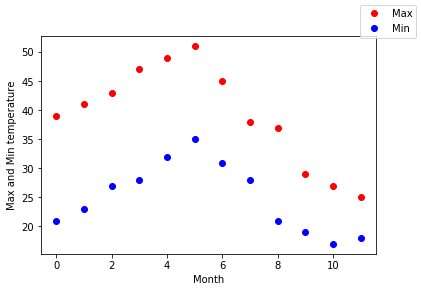

In [3]:
fig, ax= plt.subplots()
ax.plot(month,temp_max, "ro" )
ax.plot(month,temp_min, "bo")
ax.set_xlabel("Month")
ax.set_ylabel("Max and Min temperature")
fig.legend(["Max","Min"])

#### Fitting it to the periodic function

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, month,temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, month,temp_min, [-40, 20, 0])

#### Plotting the curve

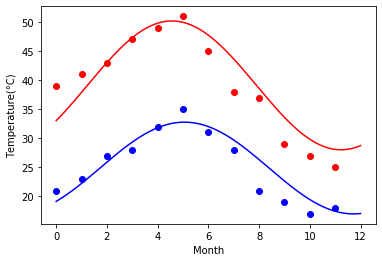

In [5]:
days=np.linspace(0,12,365)
fig, ax= plt.subplots()
ax.plot(month,temp_max, "ro" )
ax.plot(days, yearly_temps(days, *res_max), 'r-')
ax.plot(month,temp_min, "bo")
ax.plot(days, yearly_temps(days, *res_min), 'b-')
ax.set_xlabel("Month")
ax.set_ylabel("Temperature(°C)")
plt.show()

#### 2. Matplotlib:
#### This assignment is for visualization using matplotlib:
##### 1. Create a pie chart presenting the male/female proportion
##### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
# Read Dataset

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##### 1. Create a pie chart presenting the male/female proportion

Text(0.5, 1.0, 'Male/Female Proportion')

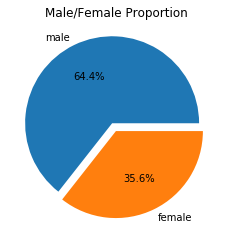

In [8]:
count=titanic['sex'].value_counts()
fig, ax = plt.subplots()
ax.pie(count.values.tolist(), labels=count.index.values.tolist(),autopct="%0.1f%%",explode=[0.1,0])
ax.set_title('Male/Female Proportion')

##### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

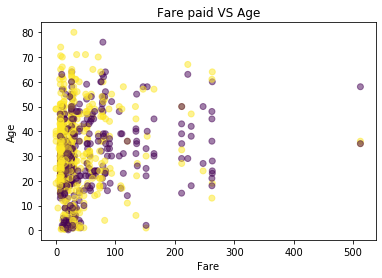

In [9]:
fig,ax2= plt.subplots()
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid VS Age')
ax2.scatter(titanic['fare'], titanic['age'], c= pd.factorize(titanic['sex'])[0], alpha=0.5)